<a href="https://colab.research.google.com/github/ggonzalezbo/MetNumUN2024I/blob/main/Lab2/ggonzalezbo_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U fortran-magic
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.1 MB/s eta 0:00:00


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [2]:
assert ran_the_first_cell, "Oh noes!"

In [3]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [4]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [5]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [6]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [7]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [8]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [9]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [10]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [12]:
4 * "a"

'aaaa'

In [13]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [14]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [15]:
%%time

matmul(a, b)

CPU times: user 32 µs, sys: 0 ns, total: 32 µs
Wall time: 36.5 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [16]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.214
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.42
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [17]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return outt

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
                print(B[0][1])
    return out
matmul(a,b)

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [18]:
def matmul(A, B):
    """Multiply matrix A by matrix B Changing."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    if( len(A[0]) == len(B)):
      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(B)):
                  out[i][j] += A[i][k] * B[k][j]
    else:
      print("Number of columns of first matrix don't match with number of rows of second matrix")
      raise Exception("Number of columns of first matrix don't match with number of rows of second matrix")
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [19]:
%%time

matmul(a, b)

Number of columns of first matrix don't match with number of rows of second matrix


Exception: Number of columns of first matrix don't match with number of rows of second matrix

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [20]:
a=[1,2],[3,4]
b=[4,5],[6,7]
matmul(a,b)

[[16, 19], [36, 43]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [21]:
from random import randint

In [22]:
import random
random.normalvariate(0,1)
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm2 = random_matrix(3, 2)
matmul(randm, randm2)

[[1.3343856599208905, 0.7577984034534397],
 [1.0390924533989756, 0.24926408270063943]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [23]:
B = [[randint(1,10) for j in range(100)] for i in range(600)]
A = [[randint(1,10) for j in range(600)] for i in range(100)]
print(A)
print(B)

[[1, 7, 4, 10, 1, 6, 9, 8, 1, 2, 4, 8, 2, 2, 1, 8, 9, 9, 3, 3, 9, 4, 1, 1, 9, 6, 5, 1, 2, 2, 8, 6, 4, 6, 10, 1, 8, 7, 3, 4, 4, 9, 9, 10, 6, 9, 1, 3, 7, 6, 8, 8, 3, 7, 6, 5, 7, 5, 10, 1, 2, 3, 2, 9, 9, 6, 2, 9, 9, 9, 3, 1, 10, 6, 2, 2, 10, 4, 5, 4, 9, 7, 2, 5, 9, 8, 6, 10, 4, 6, 2, 8, 5, 5, 7, 3, 4, 2, 9, 6, 2, 6, 7, 7, 9, 7, 8, 1, 8, 7, 9, 8, 7, 10, 10, 2, 6, 4, 10, 4, 5, 8, 8, 1, 7, 10, 1, 10, 9, 3, 9, 4, 9, 9, 3, 1, 4, 10, 8, 8, 2, 7, 4, 3, 3, 1, 1, 2, 9, 3, 8, 10, 9, 8, 9, 8, 9, 4, 7, 4, 2, 6, 4, 6, 3, 5, 5, 4, 3, 7, 8, 9, 9, 1, 3, 3, 7, 10, 2, 10, 3, 4, 8, 7, 4, 6, 10, 1, 8, 10, 9, 8, 6, 7, 2, 1, 4, 10, 3, 5, 10, 3, 7, 10, 3, 8, 8, 10, 3, 7, 10, 3, 5, 4, 6, 1, 1, 2, 4, 1, 4, 10, 7, 8, 2, 5, 3, 10, 8, 5, 9, 10, 3, 6, 5, 3, 5, 10, 9, 4, 5, 10, 9, 1, 1, 5, 10, 2, 5, 2, 7, 6, 4, 6, 10, 4, 5, 10, 10, 8, 5, 9, 9, 2, 7, 8, 6, 6, 7, 9, 7, 10, 9, 9, 9, 7, 4, 7, 4, 3, 6, 3, 2, 7, 4, 5, 3, 4, 8, 5, 9, 4, 1, 10, 10, 1, 5, 10, 4, 7, 4, 2, 10, 10, 5, 8, 5, 5, 6, 8, 9, 8, 1, 5, 10, 1, 8, 10, 7, 5

In [26]:
import time

prom = 0
for i in range(10):

  startt = time.time()
  y= matmul(A, B)
  end= time.time()
  prom += (end-startt)
prom /=10
print("The average of execution time is: ")
print(prom)

The average of execution time is: 
1.4195335865020753


In [25]:
def crono(operacion):
  import time
  idx = 10
  t_average = 0
  for i in range(idx):
    ini = time.process_time()
    out = operacion
    fin = time.process_time()
    t_average += fin - ini
  tprom=np.average(t_average/10)
  return tprom
crono(matmul(a,b))

9.520999991963208e-07

**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [27]:
import pandas as pd

def update(df, lenguaje, tiempo):
  dfupdt = pd.DataFrame({'Language':[lenguaje],'Average (s)':[tiempo]})
  return df.append(dfupdt, ignore_index=True)

datos=pd.DataFrame({'Language':[],'Average (s)':[]})
datos= update(datos,"Python",crono(matmul(A,B)))
datos

<ipython-input-27-73fc3dfba3b3>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(dfupdt, ignore_index=True)


,Language,Average (s)
0,Python,9.773000e-07


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [28]:
y  = 0
for i in range(10):
  ma = np.random.rand(600, 100)
  mb = np.random.rand(100, 600)


  start = time.process_time()
  e=ma@mb
end=time.process_time()
y=+(end-start)
y/=10
print("The average of execution time is: ")
print(y)
datos=pd.DataFrame({'Language':[],'Average (s)':[]})
datos = update(datos,"Numpy",y)
datos

The average of execution time is: 
0.0005061234999999443


<ipython-input-27-73fc3dfba3b3>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(dfupdt, ignore_index=True)


,Language,Average (s)
0,Numpy,0.000506


In [29]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9 s, sys: 36.7 ms, total: 9.03 s
Wall time: 9.44 s


In [30]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [31]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [32]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [33]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 12.3 ms, sys: 0 ns, total: 12.3 ms
Wall time: 14.2 ms


333328333350000.0

In [34]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 181 µs, sys: 4 µs, total: 185 µs
Wall time: 194 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [35]:
%%file euclidian_norm.f90
%%fortran
A=reshape((/4,6,3,2/),(/2,2/))
B=reshape((/-2,6,4,0/),(/2,2/))

Writing euclidian_norm.f90


**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [36]:
 %%fortran
subroutine fortran_matmul(C,D,E)
     double precision, dimension(:,:), intent(in) :: C
     double precision, dimension(:,:), intent(in) :: D
     double precision, dimension(2,2), intent(out) :: E

  E = matmul(C,D)

end

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [37]:
%%file euclidian_norm.f90
%%fortran
implicit none
integer :: n=2
integer :: A(2,2)
integer :: B(2,2)
A=reshape((/4,6,3,2/),(/n,n/))
B=reshape((/-2,6,4,0/),(/n,n/))
integer :: fila=1
integer :: colum=1
C(fila,colum)=0
integer :: k=1
do while (fila<=n.and.colum<=n)
C(fila,k)=C(fila,k)+A(fila,colum)*B(colum,fila)
colum=colum+1
end do
do while (fila<=n.and.colum<=n)
C(k,colum)=C(k,colum)+A(fila,colum)*B(colum,fila)
fila=fila+1
end do
k=k+1
do while (fila<=n.and.colum<=n)
C(fila,k)=C(fila,k)+A(fila,colum)*B(colum,fila)
colum=colum+1
end do
do while (fila<=n.and.colum<=n)
C(k,colum)=C(k,colum)+A(fila,colum)*B(colum,fila)
fila=fila+1
end do

Overwriting euclidian_norm.f90


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [38]:
%%fortran
subroutine fortran_matmul(X,Y,Z)
     double precision, dimension(:,:), intent(in) :: X
     double precision, dimension(:,:), intent(in) :: Y
     double precision, dimension(600,600), intent(out) :: Z

  Z = matmul(X,Y)

end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [39]:
%%time
fortran_matmul(A,B)

CPU times: user 10.7 ms, sys: 2.99 ms, total: 13.7 ms
Wall time: 17.1 ms


array([[18180., 18634., 18791., ...,     0.,     0.,     0.],
       [17192., 17618., 18006., ...,     0.,     0.,     0.],
       [17692., 18336., 18179., ...,     0.,     0.,     0.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [40]:
import time
o  = 0
for i in range(10):

   start = time.process_time()
   fortran_matmul(A,B)
   end=time.process_time()
o=+(end-start)
o/=10
print("The average of execution time is: ")
print(o)

datos= update(datos,"Fortranmagic",o)
datos

The average of execution time is: 
0.0009434451000004173


<ipython-input-27-73fc3dfba3b3>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(dfupdt, ignore_index=True)


,Language,Average (s)
0,Numpy,0.000506
1,Fortranmagic,0.000943


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [41]:
%%writefile test.f
        program TEST
            integer :: a = 600
            integer :: b = 100
            integer :: c = 600
            real :: H,sta,fin
            integer :: l, m, n, o
            double precision, dimension(600,100) :: X
            double precision, dimension(100,600) :: Y
            double precision, dimension(600,600) :: Z
            do m = 1, a
                do n = 1, a
                   X(m, n)= m+n * 0.1
                end do
            end do
           do m = 1, b
                 do n = 1, c
                    Y(m, n)= m+n * 0.5
                 end do
           end do
           H = 0.0
           do l = 1, 10
               call cpu_time(sta)
               Z = matmul(X,Y)
              call cpu_time(fin)
               H = H + (fin-sta)
           end do
           H = H/10.0
        PRINT *, H
      stop
      end

Writing test.f


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [43]:
!gfortran test.f -o test
!./test

   4.82029980E-03


**My own example 18 - Adding Fortran average execution time to the data frame**

In [44]:
import pandas as pd
import numpy as np
df = pd.DataFrame(
    {
        "a": np.random.randn(1000),
        "b": np.random.randn(1000),
        "N": np.random.randint(100, 1000, (1000)),
        "x": "x",
    }
)
df
def f(x):
    return x * (x - 1)


def integrate_f(a, b, N):
    s = 0
    dx = (b - a) / N
    for i in range(N):
        s += f(a + i * dx)
    return s * dx
%timeit df.apply(lambda x: integrate_f(x["a"], x["b"], x["N"]), axis=1)

155 ms ± 35.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [45]:
%%writefile mult_c.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

int main() {
//------------------------------
int count=10;
FILE *archivo;

  int A[600][100];
  // Rellenar la matriz
  for(int i = 0; i < 600; i++) {
    for(int j = 0; j < 100; j++) {
      A[i][j] = count+i+j;
    }
  }

//------------------------------

  int B[100][600];
  // Rellenar la matriz
  for(int i = 0; i <100; i++) {
    for(int j = 0; j < 600; j++) {
      B[i][j] = count+i+j;
    }
  }

//------------------------------

  int Resultado[600][600];

// Realizar la multiplicación 10 veces
    clock_t inicio,stop;
    double total=0.0;

    for(int repeticion=0; repeticion<10; repeticion++){
        inicio= clock();

        // Realizar la multiplicación de matrices
        for(int i = 0; i < 600; i++) {
            //printf("%d ", i);
            for(int j = 0; j < 600; j++) {
                //printf("%d ", j);
                Resultado[i][j]=0;
                for(int k = 0; k < 100; k++) {
                    Resultado[i][j] += A[i][k] * B[k][j];
                    //printf("%d ", k);
                    }
                }
            }
            stop=clock();
        total+= (double) (stop - inicio)/CLOCKS_PER_SEC;
        }
        total= total/10;
        printf("%f ", total);


    //escribir el dato en un archivo para poderlo ingresar al dataframe
    archivo = fopen("c_total.txt", "w+");
    fprintf(archivo,"%f",total);
    fclose(archivo);

  return 0 ;
}

Writing mult_c.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [46]:
!gcc mult_c.c -o mult_c
!./mult_c

0.164435 

**My own example 21 - Adding c average execution time to the data frame**

In [47]:
C = open("c_total.txt",'r')
avr_archivo = float(C.readline())
datos= update(datos,"C",avr_archivo)
datos

<ipython-input-27-73fc3dfba3b3>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(dfupdt, ignore_index=True)


,Language,Average (s)
0,Numpy,0.000506
1,Fortranmagic,0.000943
2,C,0.164435


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [48]:
%%writefile mult_c++.cc

#include <iostream>
#include <ctime>

using namespace std;
int main() {

//------------------------------
int count=10;
FILE *archivo;

  int A[600][100];
  // Rellenar la matriz
  for(int i = 0; i < 600; i++) {
    for(int j = 0; j < 100; j++) {
      A[i][j] = count+i+j;
    }
  }

//------------------------------

  int B[100][600];
  // Rellenar la matriz
  for(int i = 0; i <100; i++) {
    for(int j = 0; j < 600; j++) {
      B[i][j] = count+i+j;
    }
  }

//------------------------------

  int Resultado[600][600];

// Realizar la multiplicación 10 veces

    unsigned inicio,stop;
    double total=0.0;
    int repeticion =0;

    for(int repeticion=0; repeticion<10; repeticion++){
        inicio= clock();

        // Realizar la multiplicación de matrices
        for(int i = 0; i < 600; i++) {
            //printf("%d ", i);
            for(int j = 0; j < 600; j++) {
                //printf("%d ", j);
                Resultado[i][j]=0;
                for(int k = 0; k < 100; k++) {
                    Resultado[i][j] += A[i][k] * B[k][j];
                    //printf("%d ", k);
                    }
                }
            }
            stop=clock();
        total+= double (stop - inicio)/CLOCKS_PER_SEC;
        }
        total= total/10;
        cout << total << endl;

    //escribir el dato en un archivo para poderlo ingresar al dataframe
    archivo = fopen("c++_total.txt", "w+");
    fprintf(archivo,"%f",total);
    fclose(archivo);

  return 0 ;
}

Writing mult_c++.cc


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [49]:
!g++ mult_c++.cc -o mult_c++
!./mult_c++

0.162566


**My own example 24 - Adding C++ average execution time to the data frame**

In [50]:
C_mas_mas = open("c++_total.txt",'r')
avr_archivo = float(C_mas_mas.readline())
datos= update(datos,"C++",avr_archivo)
datos

<ipython-input-27-73fc3dfba3b3>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(dfupdt, ignore_index=True)


,Language,Average (s)
0,Numpy,0.000506
1,Fortranmagic,0.000943
2,C,0.164435
3,C++,0.162566


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [51]:
%%writefile AporB.java

import java.lang.*;
import java.io.FileWriter;
import java.io.IOException;

class AporB {

  public static void main(String[] args) {

int idx1=10;

  int [][] A = new int[600][100];
  for(int i = 0; i < 600; i++) {
    for(int j = 0; j < 100; j++) {
      A[i][j] = idx1+i+j;
    }
  }

  int [][] B = new int[100][600];
  for(int i = 0; i <100; i++) {
    for(int j = 0; j < 600; j++) {
      B[i][j] = idx1+i+j;
    }
  }

  int [][] out = new int[600][600];


    long ini ,fin ;
    double delta=0.0;

    for(int idx2=0; idx2<10; idx2++){
        ini= System.currentTimeMillis();

        for(int i = 0; i < 600; i++) {
            //printf("%d ", i);
            for(int j = 0; j < 600; j++) {
                //printf("%d ", j);
                out[i][j]=0;
                for(int k = 0; k < 100; k++) {
                    out[i][j] += A[i][k] * B[k][j];
                    //printf("%d ", k);
                    }
                }
            }
            fin=System.currentTimeMillis();
        delta+= fin - ini/1000;
        }
        delta= delta/10;
        System.out.println(delta);

        try {
        FileWriter file1 = new FileWriter("java_delta.txt");
        file1.write(Double.toString(delta));
        file1.close();}
      catch (IOException e) {
          e.printStackTrace();
      }

  return ;
  }
}

Writing AporB.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [52]:
x=!javac AporB.java
x=!java AporB

**My own example 27 - Adding Java average execution time to the data frame**

In [53]:
datos= update(datos,"Java",crono(x))
datos

<ipython-input-27-73fc3dfba3b3>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(dfupdt, ignore_index=True)


,Language,Average (s)
0,Numpy,0.000506
1,Fortranmagic,0.000943
2,C,0.164435
3,C++,0.162566
4,Java,0.000001


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [54]:
%%writefile AporBdiez.js
const { performance } = require('perf_hooks');
const fs = require("fs");

var idx1=10;

  let A = [];
  for(let i = 0; i < 600; i++) {
    A[i]=0;
    for(let j = 0; j < 100; j++) {
      A[i][j] = idx1+i+j;
    }
  }


  let B = [];
  for(let i = 0; i < 100; i++) {
    B[i]=0;
    for(let j = 0; j < 600; j++) {
      B[i][j] = idx1+i+j;
    }
  }

let out = [];

var delta=0.0;
let ini =0;
let fin =0;

    for(let idx2=0; idx2<10; idx2++){
        ini =performance.now();

        for(let i = 0; i < 600; i++) {
          out[i]=0;
            for(let j = 0; j < 600; j++) {
                out[i][j]=0;
                for(let k = 0; k < 100; k++) {
                    out[i][j] += A[i][k] * B[k][j];
                    }
                }
            }
        fin = performance.now();
        delta+= fin - ini;
         }
delta= (delta/1000);
console.log(delta);

Writing AporBdiez.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [68]:
x=!node AporBdiez.js

^C


**My own example 30 - Adding Javascript average execution time to the data frame**

In [56]:
datos= update(datos,"Javascript",crono(x))
datos

<ipython-input-27-73fc3dfba3b3>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(dfupdt, ignore_index=True)


,Language,Average (s)
0,Numpy,0.000506
1,Fortranmagic,0.000943
2,C,0.164435
3,C++,0.162566
4,Java,0.000001
5,Javascript,0.000001


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [57]:
avgmin=min(datos["Average (s)"])
avgmin

1.1412999988635875e-06

**My own example 32 - Adding the Speed factor columne to the data frame**

In [58]:
datos["Speed Factor"]=datos["Average (s)"]/avgmin

**My own example 33 - Sorting the the data frame by average execution time**

In [69]:
datos.sort_values(by=['Average (s)'])
datos

,Language,Average (s),Speed Factor
0,Numpy,0.000506,443.462280
1,Fortranmagic,0.000943,826.640761
2,C,0.164435,144076.929960
3,C++,0.162566,142439.323720
4,Java,0.000001,1.000000
5,Javascript,0.000001,1.111189


## Why is the Python Version so Much Slower?

In [60]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [71]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [72]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [73]:
data + data

array([2, 4, 6, 8])

In [74]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 326 µs, sys: 0 ns, total: 326 µs
Wall time: 334 µs


333328333350000.0

In [75]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 232 µs, sys: 0 ns, total: 232 µs
Wall time: 150 µs


333328333350000.0

In [76]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 184 µs, sys: 0 ns, total: 184 µs
Wall time: 191 µs


333328333350000.0

In [77]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [78]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [79]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [80]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [81]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [82]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [83]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [84]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [85]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [86]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [88]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [89]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [90]:
sines[:3]  # First three elements

array([0.        , 0.34185385, 0.64251645])

In [91]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [92]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [93]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [94]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [95]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [96]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [97]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [98]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [99]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [100]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [101]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [102]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [103]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [104]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [105]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [106]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [107]:
variance(np.random.standard_normal(1000))

0.9907314725970725

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [108]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [109]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [110]:
data.mean()

14.5

In [111]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [112]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [113]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [114]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [115]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [116]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [117]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [118]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [119]:
# ... or by label.
s.loc['a']

1

In [120]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [121]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [122]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [123]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [124]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [125]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [126]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [128]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

FileNotFoundError: [Errno 2] No such file or directory: 'AAPL.csv'

In [129]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

NameError: name 'aapl' is not defined

In [130]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

NameError: name 'aapl' is not defined

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!

**My own example 34**

Estudiantes Graduados UNAL https://www.datos.gov.co/Educaci-n/Estudiantes-Graduados-UNAL/3j5e-x7c4/about_data

Contiene los primeros 1000 datos del 2018 del total de estudiantes graduados en los programas de pregrado y postgrado y su información individual de la Universidad Nacional de Colombia.

In [134]:
import requests

response = requests.get('https://www.datos.gov.co/resource/3j5e-x7c4.json')
Graduados = pd.DataFrame(response.json())


Graduados

,year,semestre,tipo_nivel,nivel,dep_nac,cod_dep_nac,ciu_nac,cod_ciu_nac,lon_ciu_nac,lat_ciu_nac,...,peama,convenio,tip_convenio,facultad,snies_progra,programa,areac_snies,ca_cine,cd_cine,area_cine
0,2018,1,Postgrado,Maestría,"BOGOTÁ, D. C.",11,"BOGOTÁ, D.C.",11001,-74.1139187163,4.62457504964,...,No aplica,Sin información,Sin información,Amazonia,19920,Estudios amazónicos,Ciencias sociales y humanas,3,388,Ciencias sociales
1,2018,1,Postgrado,Especialización,ANTIOQUIA,5,MEDELLÍN,5001,-75.5770556256,6.24894080956,...,No aplica,Sin información,Sin información,Amazonia,20491,Estudios amazónicos,Ciencias sociales y humanas,3,388,Ciencias sociales
2,2018,1,Postgrado,Especialización,"BOGOTÁ, D. C.",11,"BOGOTÁ, D.C.",11001,-74.1139187163,4.62457504964,...,No aplica,Sin información,Sin información,Artes,52972,Animación,Bellas artes,2,211,Artes y humanidades
3,2018,1,Postgrado,Especialización,BOYACÁ,15,SOGAMOSO,15759,-72.923236899,5.72486205266,...,No aplica,Sin información,Sin información,Artes,53263,Diseño y desarrollo del producto,Bellas artes,2,210,Artes y humanidades
4,2018,1,Postgrado,Especialización,"BOGOTÁ, D. C.",11,"BOGOTÁ, D.C.",11001,-74.1139187163,4.62457504964,...,No aplica,Sin información,Sin información,Artes,53263,Diseño y desarrollo del producto,Bellas artes,2,210,Artes y humanidades
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018,1,Postgrado,Maestría,NORTE DE SANTANDER,54,OCAÑA,54498,-73.3551957158,8.24666636498,...,No aplica,Sin información,Sin información,Enfermería,89,Enfermería,Ciencias de la salud,9,913,Salud y bienestar
996,2018,1,Postgrado,Maestría,CALDAS,17,MANIZALES,17001,-75.4904150625,5.05705056379,...,No aplica,Sin información,Sin información,Enfermería,89,Enfermería,Ciencias de la salud,9,913,Salud y bienestar
997,2018,1,Postgrado,Maestría,VALLE DEL CAUCA,76,SEVILLA,76736,-75.9311573268,4.26719134689,...,No aplica,Sin información,Sin información,Enfermería,89,Enfermería,Ciencias de la salud,9,913,Salud y bienestar
998,2018,1,Postgrado,Maestría,"BOGOTÁ, D. C.",11,"BOGOTÁ, D.C.",11001,-74.1139187163,4.62457504964,...,No aplica,Sin información,Sin información,Enfermería,89,Enfermería,Ciencias de la salud,9,913,Salud y bienestar


**Edad de los studiantes graduados**

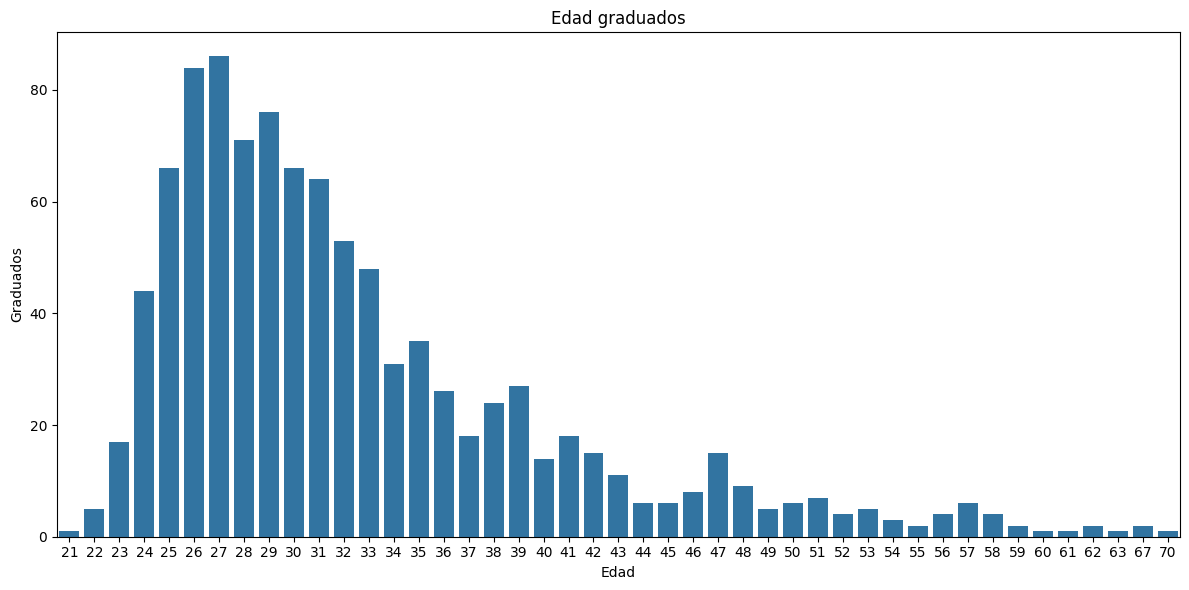

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests


url = "https://www.datos.gov.co/resource/3j5e-x7c4.json"
response = requests.get(url)
if response.status_code == 200:

    data = pd.DataFrame(response.json())
else:
    print("Error al obtener los datos de la API")


if isinstance(data, pd.DataFrame):

    edad_graduados = data.groupby(['edad']).size().reset_index(name='conteo')

    # Crear el gráfico de barras
    plt.figure(figsize=(12, 6))
    sns.barplot(x='edad', y='conteo', data=edad_graduados)
    plt.xlabel('Edad')
    plt.ylabel('Graduados')
    plt.title('Edad graduados')
    plt.tight_layout()
    plt.show()
else:
    print("Los datos no se cargaron correctamente en un DataFrame.")

**sexo de los studiantes graduados por programa**

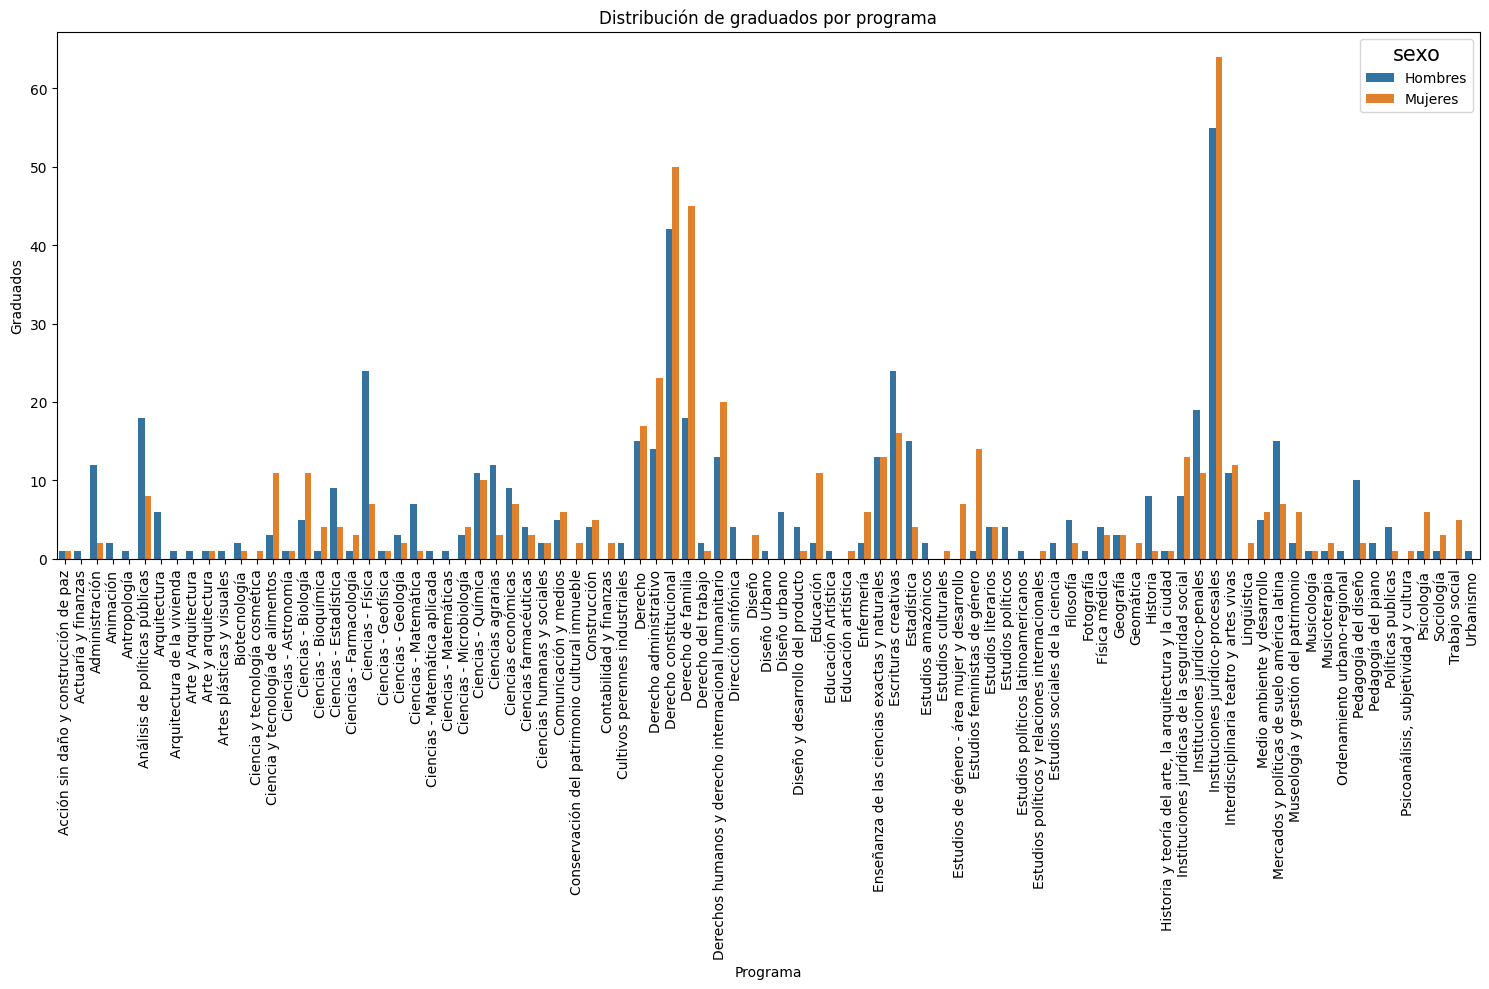

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests


url = "https://www.datos.gov.co/resource/3j5e-x7c4.json"
response = requests.get(url)
if response.status_code == 200:

    data = pd.DataFrame(response.json())
else:
    print("Error al obtener los datos de la API")


if isinstance(data, pd.DataFrame):

    programa_graduados = data.groupby(['programa', 'sexo']).size().reset_index(name='conteo')

    # Crear el gráfico de barras
    plt.figure(figsize=(15, 10))
    sns.barplot(x='programa', y='conteo', hue='sexo',  data=programa_graduados)
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para mayor legibilidad
    plt.xlabel('Programa')
    plt.ylabel('Graduados')
    plt.title('Programa')
    plt.title('Distribución de graduados por programa')
    plt.legend(title='sexo', title_fontsize='15')
    plt.tight_layout()
    plt.show()
else:
    print("Los datos no se cargaron correctamente en un DataFrame.")

In [ ]:
int('1011',3)

**Departamendto de los graduados**

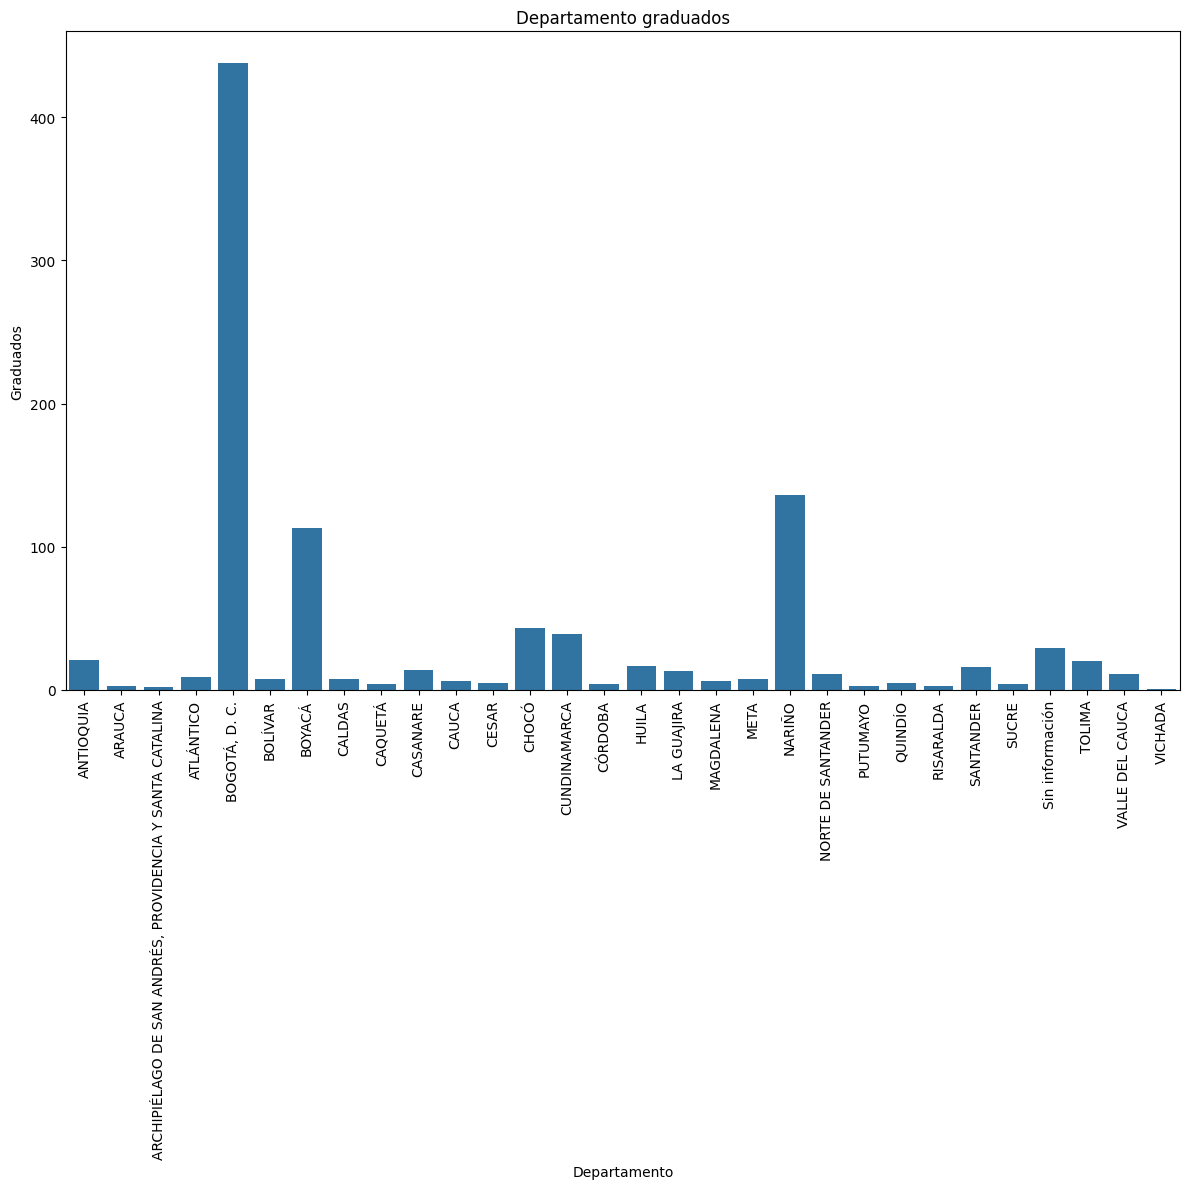

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests


url = "https://www.datos.gov.co/resource/3j5e-x7c4.json"
response = requests.get(url)
if response.status_code == 200:

    data = pd.DataFrame(response.json())
else:
    print("Error al obtener los datos de la API")


if isinstance(data, pd.DataFrame):

    dep_nac_graduados = data.groupby(['dep_nac']).size().reset_index(name='conteo')

    # Crear el gráfico de barras
    plt.figure(figsize=(12, 12))
    sns.barplot(x='dep_nac', y='conteo', data=dep_nac_graduados)
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para mayor legibilidad
    plt.xlabel('Departamento')
    plt.ylabel('Graduados')
    plt.title('Departamento graduados')
    plt.tight_layout()
    plt.show()
else:
    print("Los datos no se cargaron correctamente en un DataFrame.")